# Clasificación utilizando XGBoost (Core)

Objetivo: Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

Dataset: Heart Disease UCI

Descripción del Dataset: El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

Instrucciones:

Parte 1: Carga y Exploración Inicial de Datos

1. Carga del Dataset:
- Cargar el dataset desde Kaggle.
2. Exploración Inicial:
- Revisar la estructura del dataset.
- Describir las variables y su distribución.
- Identificar y documentar valores faltantes y outliers.


Parte 2: Análisis Exploratorio de Datos (EDA)

1. Análisis Estadístico Descriptivo:
- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
- Analizar la distribución de las variables categóricas.
2. Visualizaciones:
- Crear histogramas y gráficos de barras para entender la distribución de las variables.
- Crear un mapa de calor para visualizar las correlaciones entre las variables.
- Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.
3. Valores Faltantes y Outliers:
- Detectar y tratar valores faltantes.
- Identificar y manejar outliers.


Parte 3: Preprocesamiento de Datos

1. Transformación de Columnas:
- Codificar variables categóricas utilizando One-Hot Encoding.
- Escalar características numéricas utilizando StandardScaler.
2. División del Conjunto de Datos:
- Dividir el dataset en conjuntos de entrenamiento y prueba.


Parte 4: Implementación de XGBoost

1. Entrenamiento del Modelo:
- Entrenar un modelo de XGBoost con hiperparámetros básicos.
- Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.
2. Optimización de Hiperparámetros:
- Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.
3. Evaluación del Modelo Optimizado:
- Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

# Parte 1: Carga y Exploración Inicial de Datos

In [14]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart.csv')
print(df.head()) #Para verificar si se cargo correctamente

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [15]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
#No tenemos valores nulos
print(df.duplicated().sum())
print(df.duplicated())

723
0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [18]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [19]:
#Los datos están bien hechos.

# Parte 2: Análisis Exploratorio de Datos

In [20]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

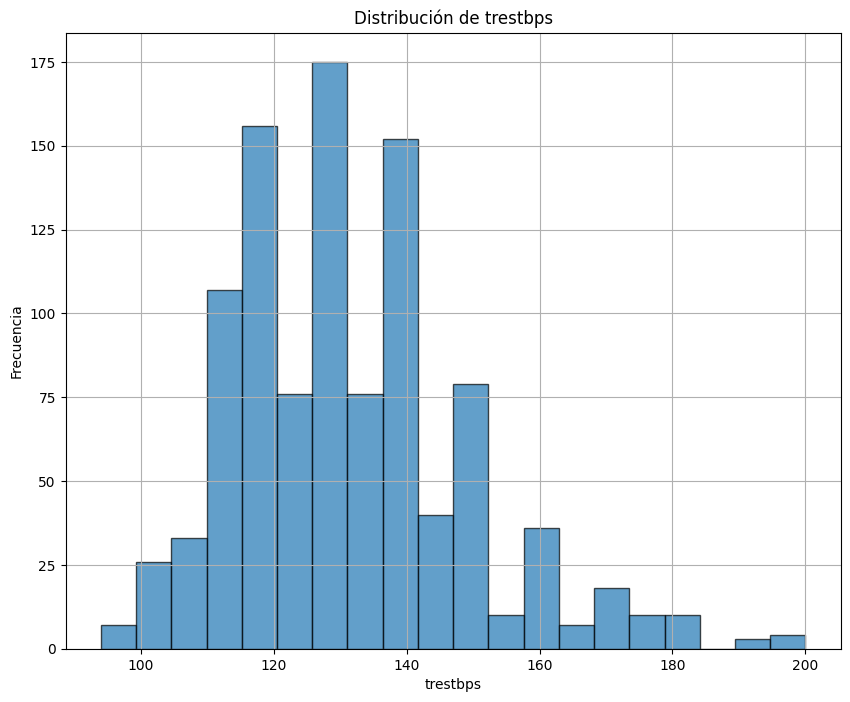

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Empezaré con algunos gráficos para entender mejor
plt.figure(figsize=(10, 8))
plt.hist(df['trestbps'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [22]:
#Indica que la mayoría de pacientes tienen entre 120 y 140 de presión arterial en reposo
import plotly.express as px

fig = px.box(df, y = 'thalach', title='Distribución de thalach')
fig.show()

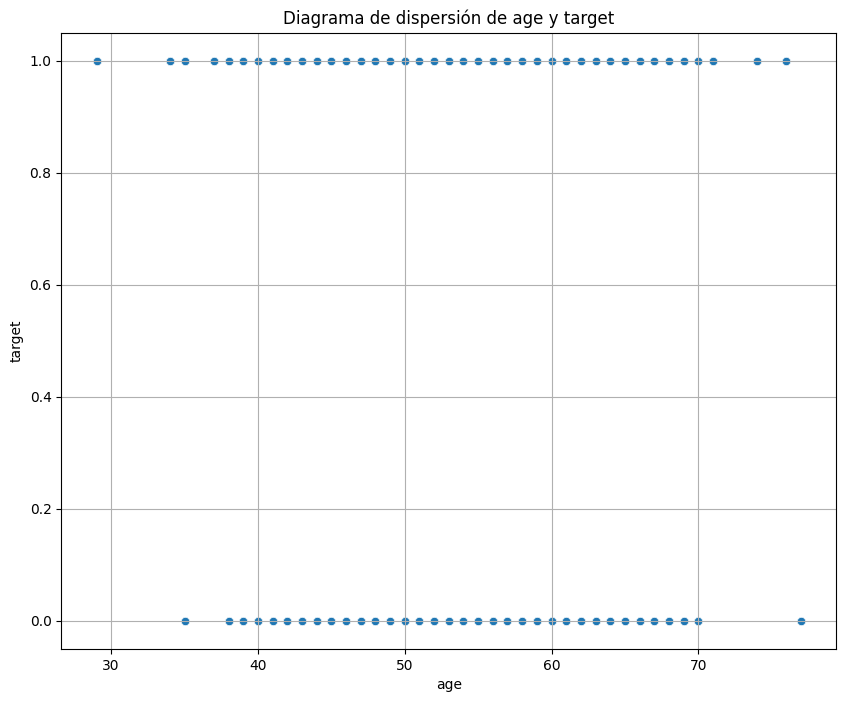

In [23]:
#Lo que veo es solo un outlier que se encuentra en 71
#La mayoría se encuentran entre 166 y 132 con una media de 152
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'age', y = 'target', data = df)
plt.title('Diagrama de dispersión de age y target')
plt.xlabel('age')
plt.ylabel('target')
plt.grid(True)
plt.show()

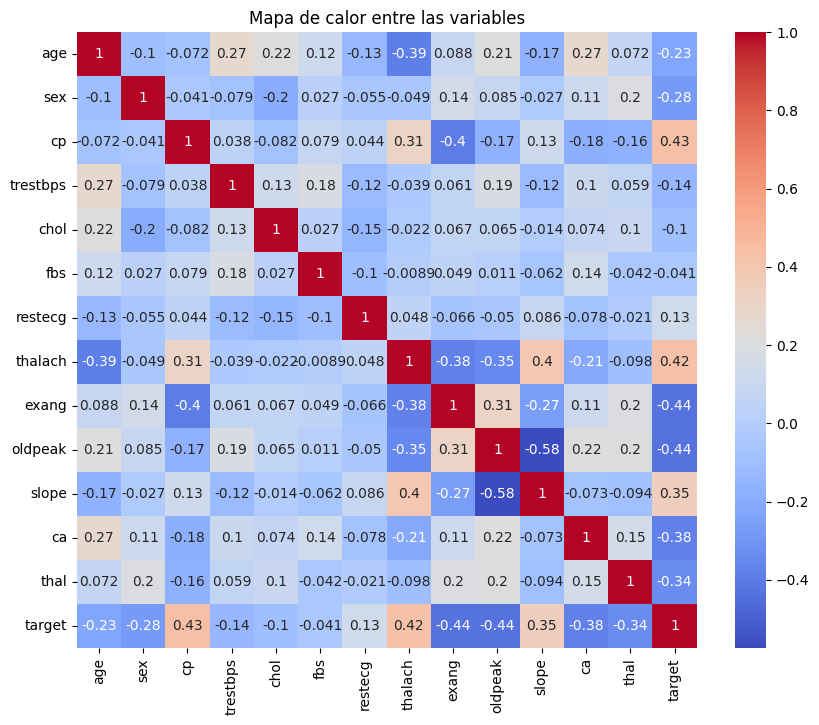

In [24]:
#Puedo ver que no hay una relación muy fuerte entre ambas variables
#Quiere decir que no siempre a maypr edad tengo problemas cardiacos
plt.figure(figsize=(10, 8))
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [25]:
#Los valores que veo importantes son slope y oldpeak
#Me indican -0.58 que a mayor slope, menor oldpeak
#cp com target con 0.43 que me indica que si tenemos dolor en el pecho muy probablemente que tenga problemas cardiacos

# Parte 3 : Preprocesamiento de Datos

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart.csv')

#Selecciono la variable objetivo y la separo
X = df.drop('target', axis = 1) #Con esto selecciono todas las columnas, excepto charges
y = df['target'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[19:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[102   0]
 [  3 100]]


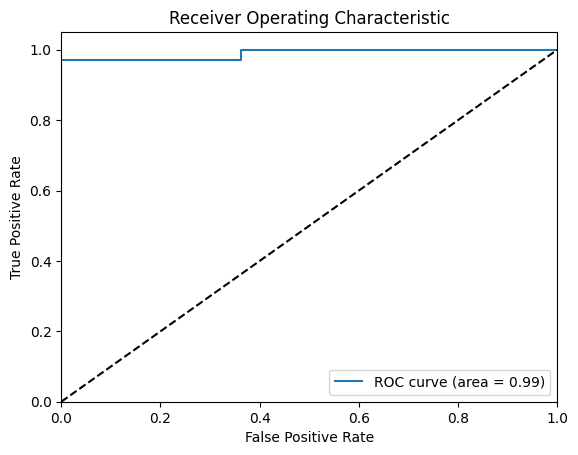

In [37]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Ahora voy a tratar de optimizarlo con Grid Search
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y su rendimiento
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores Hiperparámetros:", best_params)
print("Mejor ROC-AUC:", best_score)

best_pipeline = grid_search.best_estimator_

y_pred = best_pipeline.predict(X_test)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] EN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classi

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END class

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.0s
[CV] END classi

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s
[CV] END clas

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[102   0]
 [  3 100]]


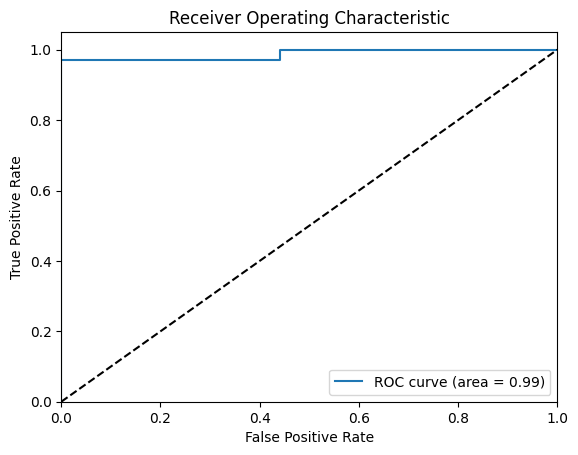

In [41]:
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
#No veo cambios.